# 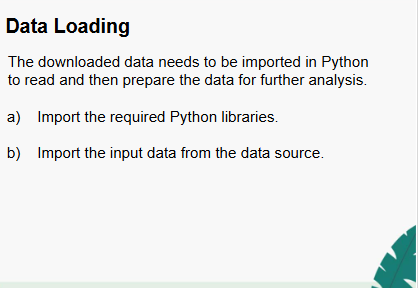

In [9]:
# a) import requireed python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [15]:
#b) importing data
income_data=pd.read_csv('ds_c9_s1_practice-main/ds_c9_s1_practice-main/DS1_C9_S1_Practice_Income_Data.csv')
income_data.head(3)

,Age,WorkClass,Fnlwgt,Education,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K


# 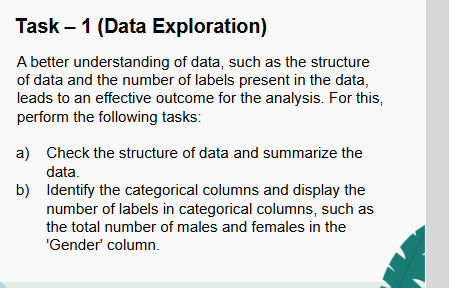

# a) structure and summarizing the data

In [22]:
income_data.shape # the  dataset consists of 32561 rows and 13 columns 

(32561, 13)

In [24]:
income_data.columns # these are the names of the 13 columns in the dataframe

Index(['Age', 'WorkClass', 'Fnlwgt', 'Education', 'Marital_Status',
       'Occupation', 'Relationship', 'Gender', 'Capital_Gain', 'Capital_Loss',
       'Hours_Per_Week', 'Native_Country', 'Income_Bracket'],
      dtype='object')

In [26]:
income_data.info() # this gives the information of the columns data type and thr basic information's like count ,non null and column names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   WorkClass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Marital_Status  32561 non-null  object
 5   Occupation      32561 non-null  object
 6   Relationship    32561 non-null  object
 7   Gender          32561 non-null  object
 8   Capital_Gain    32561 non-null  int64 
 9   Capital_Loss    32561 non-null  int64 
 10  Hours_Per_Week  32561 non-null  int64 
 11  Native_Country  32561 non-null  object
 12  Income_Bracket  32561 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


In [30]:
income_data.isnull().sum() # there is no missing values in the column in the data frame

Age               0
WorkClass         0
Fnlwgt            0
Education         0
Marital_Status    0
Occupation        0
Relationship      0
Gender            0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

In [28]:
income_data.describe()# this is the summary of the dataset's  each numerical dataset gives count ,mean,std,min,25% ,50%,75%,max. 

,Age,Fnlwgt,Capital_Gain,Capital_Loss,Hours_Per_Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


# b) Identify the categorical columns and display the number of labels in categorical columns, such as the total number of males and females in the 'Gender' column.

In [61]:
cat=income_data.select_dtypes(include='object')
cat.tail(2)

,WorkClass,Education,Marital_Status,Occupation,Relationship,Gender,Native_Country,Income_Bracket
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,Male,United-States,<=50K
32560,Self-emp-inc,HS-grad,Married-civ-spouse,Exec-managerial,Wife,Female,United-States,>50K


# number of labels 

In [64]:
for x in cat.columns:
    a=cat[x].value_counts()
    print(a)
    print()

WorkClass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

Education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

Marital_Status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

Occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial   

# 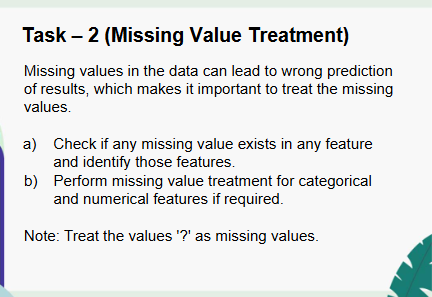

In [66]:
#Task 2
# a) and b
income_data.isnull().sum()

Age               0
WorkClass         0
Fnlwgt            0
Education         0
Marital_Status    0
Occupation        0
Relationship      0
Gender            0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

In [76]:
for x in income_data:
    print(income_data[x].unique()) #WorkClass ,Native_Country

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[ 77516  83311 215646 ...  34066  84661 257302]
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
[' Not-in-family' ' Husband' ' Wif

In [ ]:
#WorkClass 

In [80]:
income_data['WorkClass'][income_data['WorkClass']==' ?']

27        ?
61        ?
69        ?
77        ?
106       ?
         ..
32530     ?
32531     ?
32539     ?
32541     ?
32542     ?
Name: WorkClass, Length: 1836, dtype: object

In [88]:
income_data['WorkClass'][income_data['WorkClass']==' ?']=income_data['WorkClass'].mode()# replaced with mode 

In [90]:
income_data['WorkClass'][income_data['WorkClass']==' ?']

Series([], Name: WorkClass, dtype: object)

# Native_Country

In [92]:
income_data['Native_Country'][income_data['Native_Country']==' ?']

14        ?
38        ?
51        ?
61        ?
93        ?
         ..
32449     ?
32469     ?
32492     ?
32510     ?
32525     ?
Name: Native_Country, Length: 583, dtype: object

In [94]:
income_data['Native_Country'][income_data['Native_Country']==' ?']=income_data['Native_Country'].mode()

In [102]:
income_data['Native_Country'][income_data['Native_Country']==' ?']

Series([], Name: Native_Country, dtype: object)

# 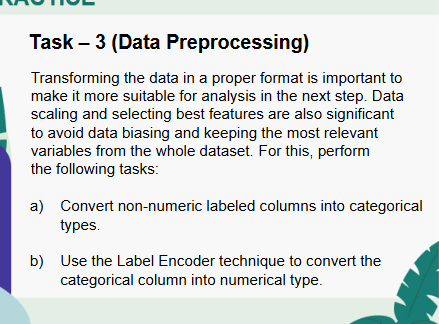

# a)cat consisits of categorical variable

In [104]:
for x in cat.columns:
    income_data[x]=income_data[x].astype('category')

In [107]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             32561 non-null  int64   
 1   WorkClass       30725 non-null  category
 2   Fnlwgt          32561 non-null  int64   
 3   Education       32561 non-null  category
 4   Marital_Status  32561 non-null  category
 5   Occupation      32561 non-null  category
 6   Relationship    32561 non-null  category
 7   Gender          32561 non-null  category
 8   Capital_Gain    32561 non-null  int64   
 9   Capital_Loss    32561 non-null  int64   
 10  Hours_Per_Week  32561 non-null  int64   
 11  Native_Country  31978 non-null  category
 12  Income_Bracket  32561 non-null  category
dtypes: category(8), int64(5)
memory usage: 1.5 MB


# we have changed object data type into categorical

In [111]:
# b)
# using label_encoder to convert categorical columns to numeric type.
label_encoder=preprocessing.LabelEncoder()
for x in cat.columns:
    income_data[f'{x}_encode']=label_encoder.fit_transform(income_data[x])
    
    

In [113]:
income_data

,Age,WorkClass,Fnlwgt,Education,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,...,Native_Country,Income_Bracket,WorkClass_encode,Education_encode,Marital_Status_encode,Occupation_encode,Relationship_encode,Gender_encode,Native_Country_encode,Income_Bracket_encode
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,2174,0,...,United-States,<=50K,6,9,4,1,1,1,38,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,...,United-States,<=50K,5,9,2,4,0,1,38,0
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,...,United-States,<=50K,3,11,0,6,1,1,38,0
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,...,United-States,<=50K,3,1,2,6,0,1,38,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,...,Cuba,<=50K,3,9,2,10,5,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,Female,0,0,...,United-States,<=50K,3,7,2,13,5,0,38,0
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,...,United-States,>50K,3,11,2,7,0,1,38,1
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,Female,0,0,...,United-States,<=50K,3,11,6,1,4,0,38,0
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,Male,0,0,...,United-States,<=50K,3,11,4,1,3,1,38,0


# 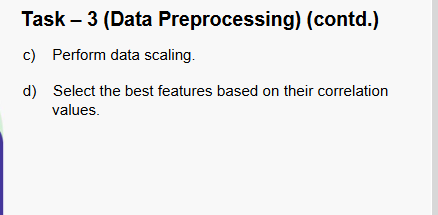

In [123]:
# c) 
# data scale
def feature_scale(scale):
    numerics=['int64','int32']
    new_income_df=income_data.select_dtypes(include=numerics)
    if scale=='minmax':
        scaler=MinMaxScaler()
    else:
        scaler=StandardScaler()
    df_scaled=pd.DataFrame(scaler.fit_transform(new_income_df.to_numpy()),columns=new_income_df.columns)
    return df_scaled

In [125]:
scale='minmax'
income_df_scaled=feature_scale(scale)
income_df_scaled.head(2)

,Age,Fnlwgt,Capital_Gain,Capital_Loss,Hours_Per_Week,WorkClass_encode,Education_encode,Marital_Status_encode,Occupation_encode,Relationship_encode,Gender_encode,Native_Country_encode,Income_Bracket_encode
0,0.301370,0.044302,0.02174,0.0,0.397959,0.750,0.6,0.666667,0.071429,0.2,1.0,0.926829,0.0
1,0.452055,0.048238,0.00000,0.0,0.122449,0.625,0.6,0.333333,0.285714,0.0,1.0,0.926829,0.0


In [131]:
# d)
corr=income_df_scaled.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Fnlwgt,Capital_Gain,Capital_Loss,Hours_Per_Week,WorkClass_encode,Education_encode,Marital_Status_encode,Occupation_encode,Relationship_encode,Gender_encode,Native_Country_encode,Income_Bracket_encode
Age,1.000000,-0.076646,0.077674,0.057775,0.068756,0.059423,-0.010508,-0.266288,-0.020947,-0.263698,0.088832,-0.000176,0.234037
Fnlwgt,-0.076646,1.000000,0.000432,-0.010252,-0.018768,-0.019164,-0.028145,0.028153,0.001597,0.008931,0.026858,-0.062710,-0.009463
Capital_Gain,0.077674,0.000432,1.000000,-0.031615,0.078409,0.010687,0.030046,-0.043393,0.025505,-0.057919,0.048480,0.009651,0.223329
Capital_Loss,0.057775,-0.010252,-0.031615,1.000000,0.054256,-0.009888,0.016746,-0.034187,0.017987,-0.061062,0.045567,0.010037,0.150526
Hours_Per_Week,0.068756,-0.018768,0.078409,0.054256,1.000000,-0.093411,0.055510,-0.190519,0.080383,-0.248974,0.229309,0.007332,0.229689
WorkClass_encode,0.059423,-0.019164,0.010687,-0.009888,-0.093411,1.000000,-0.019375,0.042236,-0.264004,0.012817,0.002306,0.001253,-0.055124
Education_encode,-0.010508,-0.028145,0.030046,0.016746,0.055510,-0.019375,1.000000,-0.038407,-0.021260,-0.010876,-0.027356,0.075186,0.079317
Marital_Status_encode,-0.266288,0.028153,-0.043393,-0.034187,-0.190519,0.042236,-0.038407,1.000000,-0.009654,0.185451,-0.129314,-0.020456,-0.199307
Occupation_encode,-0.020947,0.001597,0.025505,0.017987,0.080383,-0.264004,-0.021260,-0.009654,1.000000,-0.075607,0.080296,-0.003090,0.075468
Relationship_encode,-0.263698,0.008931,-0.057919,-0.061062,-0.248974,0.012817,-0.010876,0.185451,-0.075607,1.000000,-0.582454,-0.010940,-0.250918


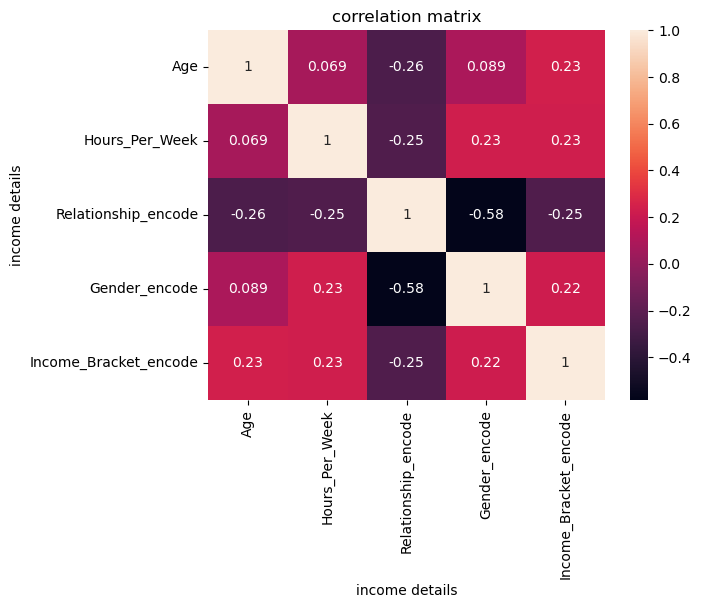

In [142]:
new_income_df=income_df_scaled[['Age','Hours_Per_Week','Relationship_encode','Gender_encode','Income_Bracket_encode']]
hm=sns.heatmap(new_income_df.corr(),annot=True)
hm.set(xlabel='income details',ylabel='income details',title='correlation matrix')
plt.show()

In [144]:
del income_data['Relationship_encode']
income_data

,Age,WorkClass,Fnlwgt,Education,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket,WorkClass_encode,Education_encode,Marital_Status_encode,Occupation_encode,Gender_encode,Native_Country_encode,Income_Bracket_encode
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K,6,9,4,1,1,38,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K,5,9,2,4,1,38,0
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K,3,11,0,6,1,38,0
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K,3,1,2,6,1,38,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K,3,9,2,10,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States,<=50K,3,7,2,13,0,38,0
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States,>50K,3,11,2,7,1,38,1
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States,<=50K,3,11,6,1,0,38,0
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,Male,0,0,20,United-States,<=50K,3,11,4,1,1,38,0


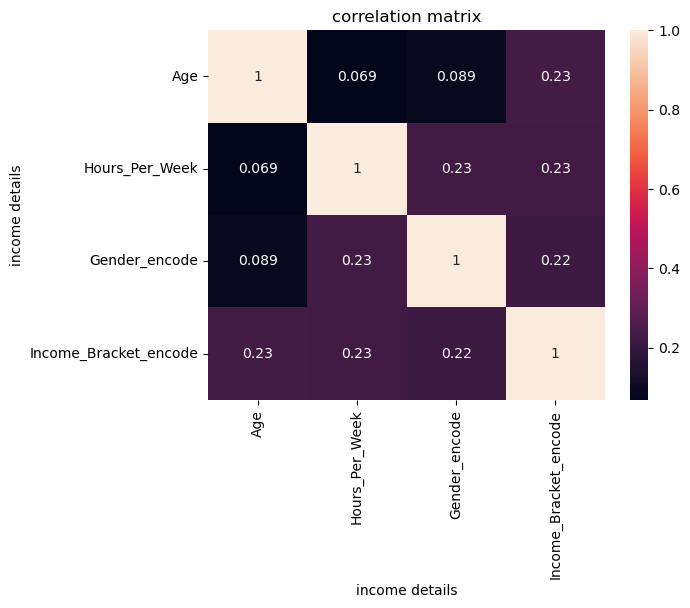

In [146]:
new_income_df=income_df_scaled[['Age','Hours_Per_Week','Gender_encode','Income_Bracket_encode']]
hm=sns.heatmap(new_income_df.corr(),annot=True)
hm.set(xlabel='income details',ylabel='income details',title='correlation matrix')
plt.show()

# 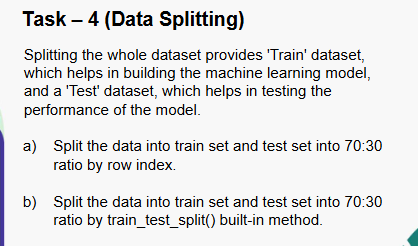

In [148]:
# 4a)
income_data.shape

(32561, 20)

In [156]:
train_num=int(32561*0.7)
load_df_train=income_data.iloc[:train_num,:]
load_df_test=income_data.iloc[(train_num+1):,:]
load_df_train.shape

(22792, 20)

In [158]:
load_df_test.shape

(9768, 20)

In [160]:
# b)
y=income_data['Income_Bracket_encode']
x=income_data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=200)


In [162]:
x_train.shape

(22792, 20)

In [164]:
x_test.shape

(9769, 20)

In [166]:
y_train.shape

(22792,)

In [168]:
y_test.shape

(9769,)

# 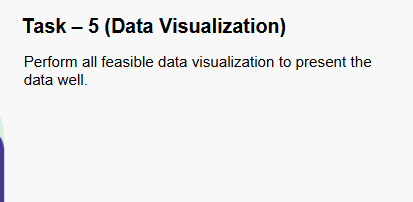

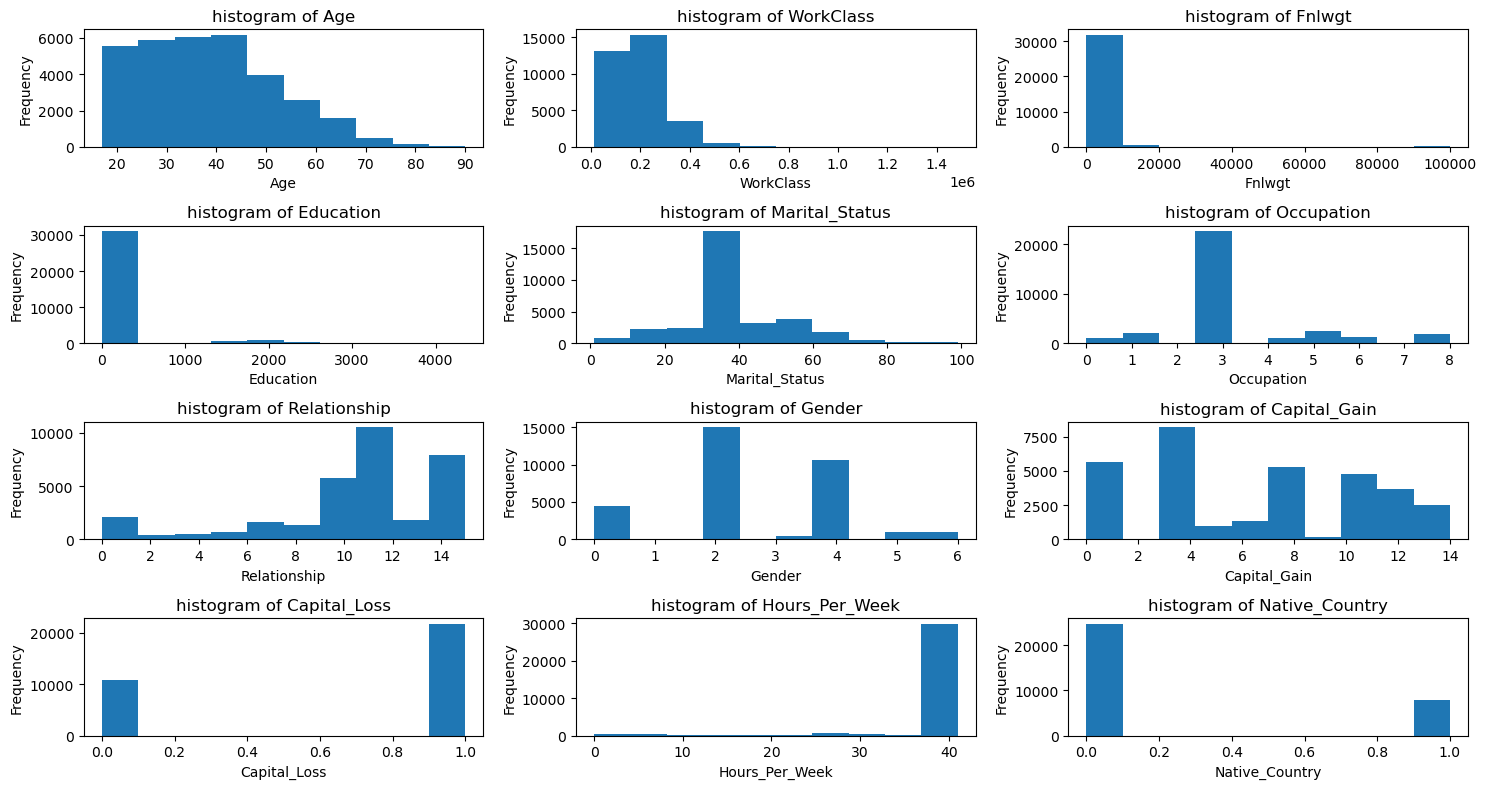

In [184]:
# histogram
a=income_data.columns
axs=income_data.hist(bins=10,grid=False,figsize=(15,8))
for ax,i in zip(axs.flatten(),a):
    ax.set_title(f'histogram of {i}')
    ax.set_xlabel(i)
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

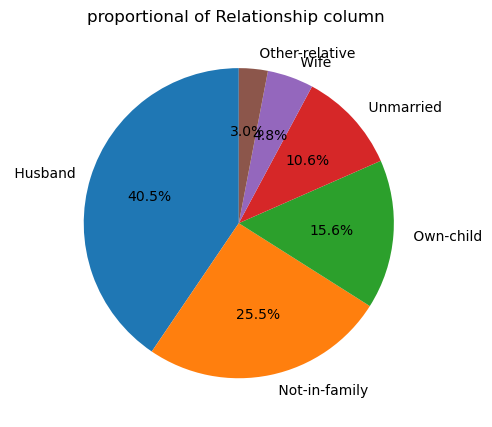

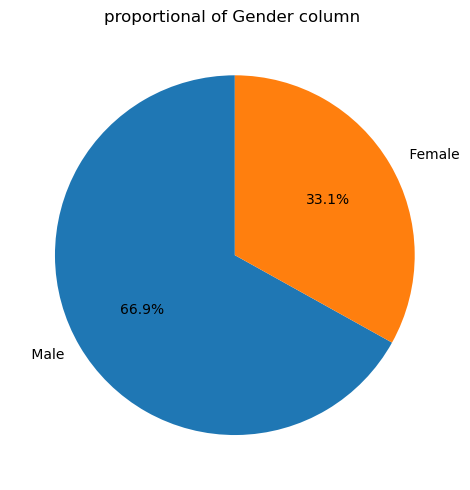

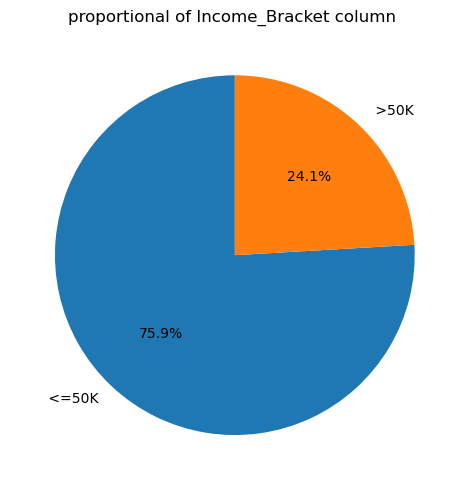

In [228]:
x=cat.columns
for i in x:
    a=income_data[i].value_counts()
    if len(a)<=6:
        plt.figure(figsize=(5,5))
        plt.pie(a,autopct='%1.1f%%',labels=a.index,startangle=90)
        plt.title(f'proportional of {i} column ')
        plt.tight_layout()        
        plt.show()
